In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
do=pd.read_csv('https://datahub.io/core/oil-prices/r/brent-day.csv',index_col='Date',parse_dates=['Date'])
do[:5]

,Brent Spot Price
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63


In [5]:
do

,Brent Spot Price
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63
...,...
2016-02-02,30.98
2016-02-03,32.38
2016-02-04,32.76


<Axes: xlabel='Date'>

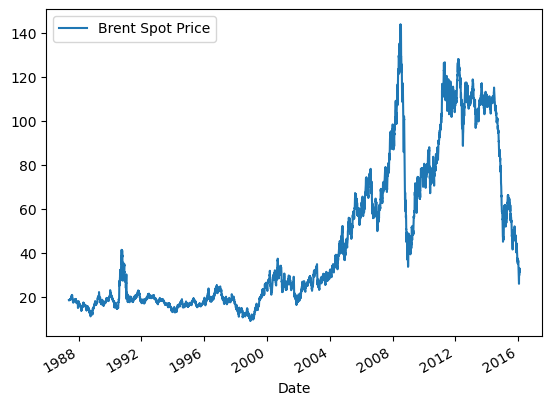

In [6]:
do.plot()

In [7]:
do.columns=['Brent']
do

,Brent
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63
...,...
2016-02-02,30.98
2016-02-03,32.38
2016-02-04,32.76


In [9]:
ds=pd.read_csv('https://stooq.com/q/d/l/?s=^set&i=d',parse_dates=['Date'],index_col=['Date'])
ds

,Open,High,Low,Close,Volume
Date,,,,,
1975-04-30,100.00,100.00,100.00,100.00,NaN
1975-05-30,89.98,89.98,89.98,89.98,NaN
1975-06-30,91.64,91.64,91.64,91.64,NaN
1975-07-31,98.02,98.02,98.02,98.02,NaN
1975-08-29,98.39,98.39,98.39,98.39,NaN
...,...,...,...,...,...
2023-12-26,1408.17,1414.44,1406.50,1413.45,2.856812e+09
2023-12-27,1415.06,1416.10,1407.62,1410.43,2.744683e+09
2023-12-28,1410.87,1418.98,1410.87,1415.85,3.249400e+09


<Axes: xlabel='Date'>

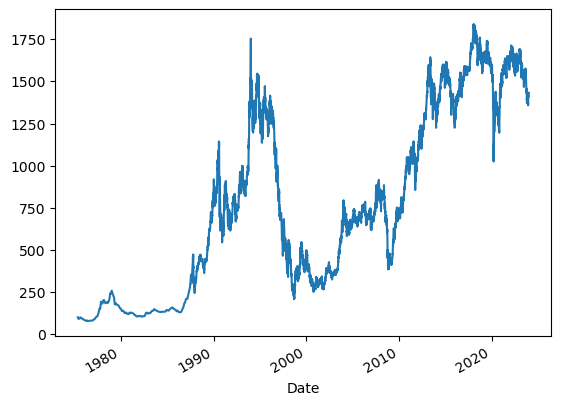

In [10]:
ds['Close'].plot()

In [13]:
df=pd.merge(ds['Close'],do,left_index=True,right_index=True,how='inner')
df

,Close,Brent
Date,,
1987-05-29,269.07,18.58
1987-06-30,299.87,19.08
1987-07-02,299.00,19.25
1987-07-03,314.22,19.33
1987-07-06,317.59,19.48
...,...,...
2016-02-02,1285.30,30.98
2016-02-03,1291.77,32.38
2016-02-04,1297.11,32.76


In [14]:
df.columns=['SET','Brent']
df

,SET,Brent
Date,,
1987-05-29,269.07,18.58
1987-06-30,299.87,19.08
1987-07-02,299.00,19.25
1987-07-03,314.22,19.33
1987-07-06,317.59,19.48
...,...,...
2016-02-02,1285.30,30.98
2016-02-03,1291.77,32.38
2016-02-04,1297.11,32.76


In [15]:
df.corr()

,SET,Brent
SET,1.000000,0.420402
Brent,0.420402,1.000000


<Axes: >

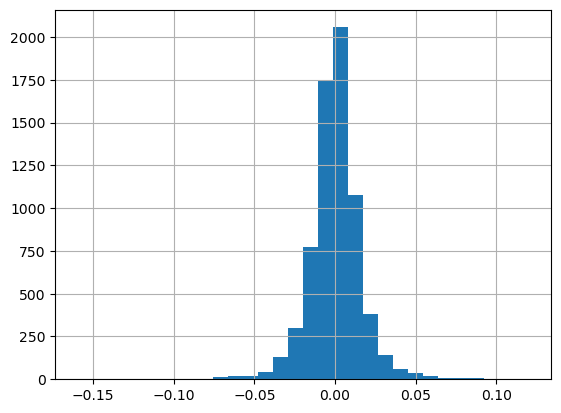

In [18]:
df['SET'].pct_change().hist(bins=30)

<Axes: >

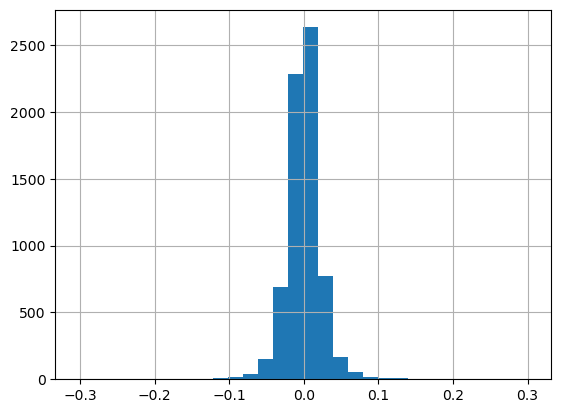

In [19]:
df['Brent'].pct_change().hist(bins=30)

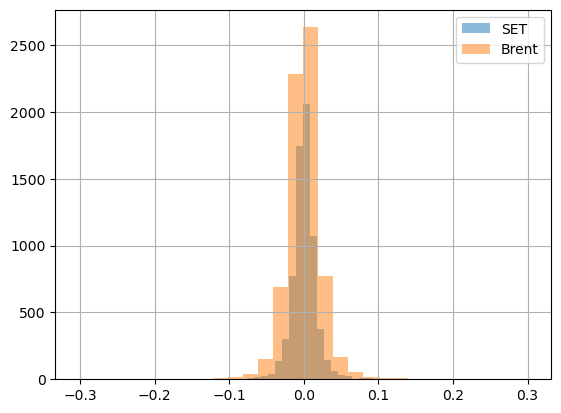

In [24]:
df['SET'].pct_change().hist(bins=30,alpha=.5,label='SET')
df['Brent'].pct_change().hist(bins=30,alpha=.5,label='Brent')
plt.legend()

<Axes: xlabel='Date'>

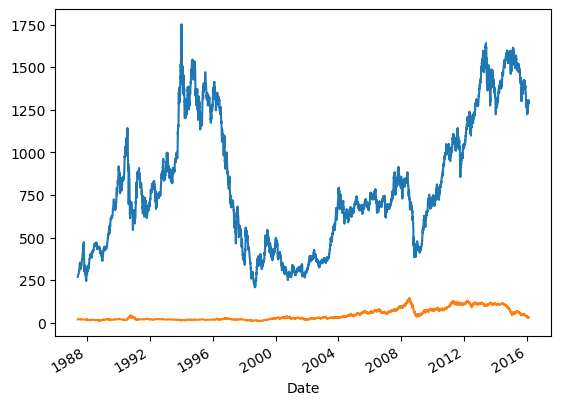

In [26]:
df['SET'].plot()
df['Brent'].plot()

In [27]:
df['SET']

Date
1987-05-29     269.07
1987-06-30     299.87
1987-07-02     299.00
1987-07-03     314.22
1987-07-06     317.59
               ...   
2016-02-02    1285.30
2016-02-03    1291.77
2016-02-04    1297.11
2016-02-05    1306.29
2016-02-08    1307.57
Name: SET, Length: 6854, dtype: float64

In [28]:
df['SET'].iloc[0]

269.07

In [31]:
df['SET_chg']=df['SET']/df['SET'].iloc[0]-1
df['Brent_chg']=df['Brent']/df['Brent'].iloc[0]-1
df

,SET,Brent,SET_chg,Brent_chg
Date,,,,
1987-05-29,269.07,18.58,0.000000,0.000000
1987-06-30,299.87,19.08,0.114468,0.026911
1987-07-02,299.00,19.25,0.111235,0.036060
1987-07-03,314.22,19.33,0.167800,0.040366
1987-07-06,317.59,19.48,0.180325,0.048439
...,...,...,...,...
2016-02-02,1285.30,30.98,3.776824,0.667384
2016-02-03,1291.77,32.38,3.800870,0.742734
2016-02-04,1297.11,32.76,3.820716,0.763186


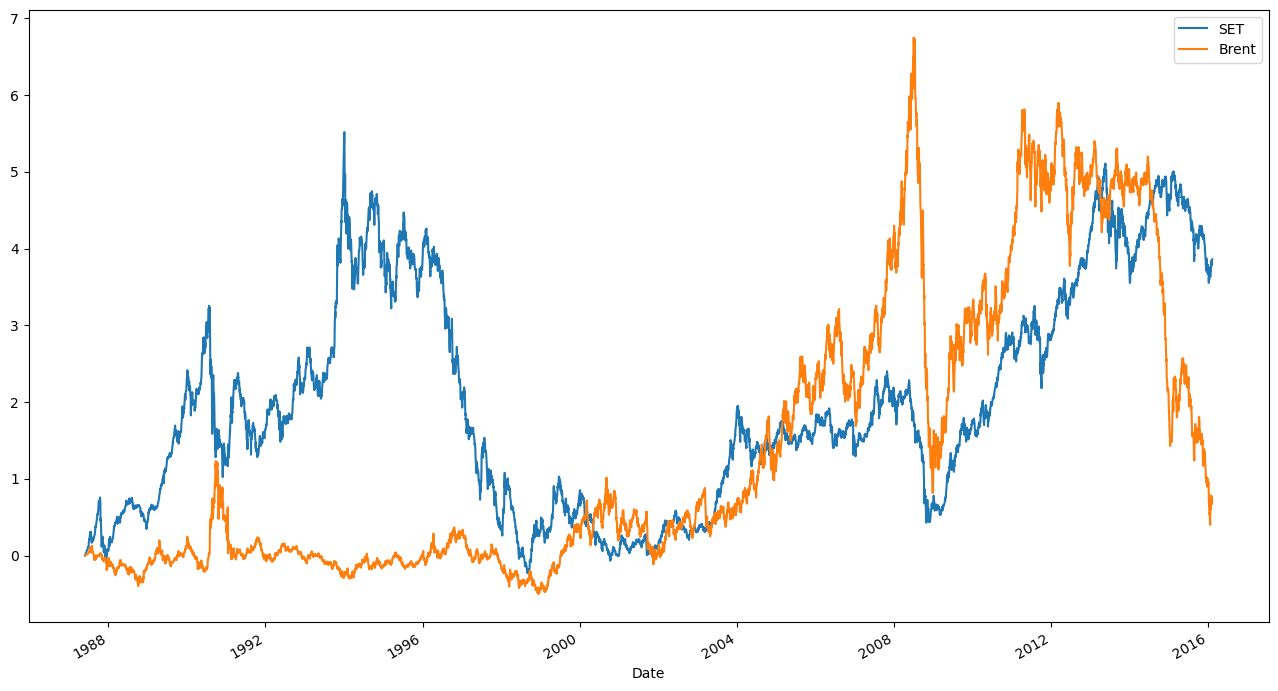

In [36]:
df['SET_chg'].plot(label='SET',figsize=(16,9))
df['Brent_chg'].plot(label='Brent')
plt.legend()